In [9]:
seoul <- read.csv(("DataBackup/newSeoul2019.csv") )
seoul19 <- subset(seoul, 년도==2019)

In [12]:
str(seoul19)
rownames(seoul19) <- c()
head(seoul19)

'data.frame':	300 obs. of  6 variables:
 $ 년도    : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  87 66 87 85 112 95 83 115 99 104 ...
 $ 사망자수: int  1 1 2 0 1 1 0 0 0 0 ...
 $ 부상자수: int  125 84 122 131 158 116 109 164 143 139 ...


년도,월,자치구명,발생건수,사망자수,부상자수
2019,1,종로구,87,1,125
2019,2,종로구,66,1,84
2019,3,종로구,87,2,122
2019,4,종로구,85,0,131
2019,5,종로구,112,1,158
2019,6,종로구,95,1,116


In [11]:
# NA 값 확인
for(i in 1: ncol(seoul19)){
    cat( colnames(seoul19)[i], ":" , sum(is.na(seoul19[,i])) ,"\n")
}

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


In [21]:
cor(seoul19$발생건수, seoul19$부상자수) 
# 98% 관계가 있다. 발생건수가 증가할수록 부상자수도 증가한다

[1] 0.9856482

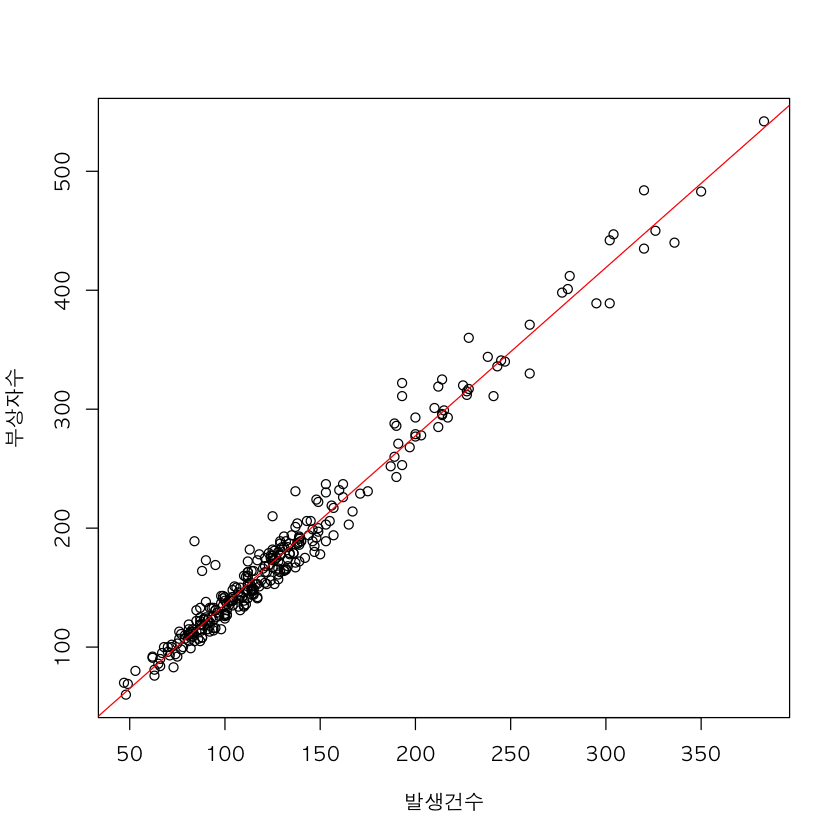

In [24]:
options(warn = -1)
par( family = 'AppleGothic' , bg = 'white' )
plot(seoul19$부상자수 ~ seoul19$발생건수 , xlab = '발생건수' , ylab = '부상자수')

# 회귀선
r <- lm(seoul19$부상자수 ~ seoul19$발생건수)
abline(r , col = 'red')

In [19]:
summary(r)


Call:
lm(formula = seoul19$부상자수 ~ seoul19$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.950  -8.074  -1.163   6.313  75.656 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -5.56873    2.00481  -2.778  0.00582 ** 
seoul19$발생건수  1.41563    0.01405 100.792  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.87 on 298 degrees of freedom
Multiple R-squared:  0.9715,	Adjusted R-squared:  0.9714 
F-statistic: 1.016e+04 on 1 and 298 DF,  p-value: < 2.2e-16


In [22]:
r


Call:
lm(formula = seoul19$부상자수 ~ seoul19$발생건수)

Coefficients:
     (Intercept)  seoul19$발생건수  
          -5.569             1.416  
